In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit

In [145]:
class FeedForward(object):
    def __init__(self):
        
        self.inputLayerSize = 2 # máme dva vstupy
        self.outputLayerSize = 1 # jeden výstup
        self.hiddenLayerSize = 3 # tri neuróny v skrytej vrstve
        
        # inicializujeme váhy (2x3) kt. sú medzi vstupnou a skrytou vrstvou
        self.FIRST_WEIGHTS = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        # inicializujeme váhy (3x1) kt. sú medzi skrytou a výstupnou vrstvou
        self.SECOND_WEIGHTS = np.random.randn( self.hiddenLayerSize,self.outputLayerSize)  
        
        
    def forward_function(self, X): #prechádzame ns
        
        #vynásobíme prvé váhy so vstupom a sčítame
        self.product_1 = np.dot(X,self.FIRST_WEIGHTS) 
        #zavoláme aktivačnú funkciu
        self.activ_output = self.activation_function(self.product_1)
        #vynásobíme výsledok aktiv. fun. s druhými váhami a sčítame
        self.product_2 = np.dot(self.activ_output, self.SECOND_WEIGHTS)
        #opät zavoláme aktiv. fun. a vrátime výsledok ns
        return self.activation_function(self.product_2) 

    def activation_function(self, s): #aktivačná funkcia typu sigmoid
        return 1 / (1 + np.exp(-s))

    def act_func_derivation(self, s): #derivácia aktivačnej funkcie
        return s * (1 - s)

    def back_propagation(self, X, y, nn_output): #metoda spätného šírenia chýb
        #určíme chybu výsledku ns
        self.output_error = y - nn_output  
        #vypočítame o kolko upravíme druhé váhy 
        self.output_delta = self.output_error * self.act_func_derivation(nn_output)  
        #určíme ako moc prispeli druhé váhy k chybe
        self.product_2_error = self.output_delta.dot(self.SECOND_WEIGHTS.T)
        #vypočítame o kolko upravíme prvé váhy 
        self.product_2_delta = self.product_2_error * self.act_func_derivation(self.activ_output)  
        

        #upravíme prvé váhy
        self.FIRST_WEIGHTS += X.T.dot(self.product_2_delta)  
        #upravíme druhé váhy
        self.SECOND_WEIGHTS += self.activ_output.T.dot(self.output_delta)  
        
    def train(self, X, y):#trenovanie ns
        self.back_propagation(X, y, self.forward_function(X))

    def predict(self):#určenie výsledku
        
        print("Očakávané hodnoty:")
        print(*expected)
        print()
        print ("Predikcia na základe trénovania: ")
        output = np.round(self.forward_function(Guess)*100, 1)
        print (*output)
        
        #prvý graf na ktorom sú zobrazene skutočné hodnoty a predikované hodnoty(trénovacie dáta)   
        pit.figure(figsize=(15, 5))
        pit.title('Predikcia kombinovanej spotreby')
        pit.plot(expected,'g', label='Očakávaný výsledok')
        pit.plot(output,'r', label='Odhadnutý výsledok')
        pit.xlabel('Vstupy')
        pit.ylabel('Priemerná spotreba')
        pit.legend(loc='upper left')
        pit.figure(figsize=(15, 5))
        print()
        
        #výpočet priemernej odchýlky v %, teda ako moc sa líši predikovaná hodnota od tej očakávanej 
        a1 = expected-output
        a1 = abs(a1)
        a2 = a1/expected*100;
        average = sum(a2)/len(a2)
        average = np.round(average,2)
        print('Priemerná odchýlka(%): ',average)
        
        pit.subplot()
        print('-----------------------------------------------------------------------------------------------------------------------')
        print('Predikcia dát na ktorých sa netrénovalo')
        print()
        print("Očakávané hodnoty:")
        print(*test_data_y)
        print()
        test_output = np.round(self.forward_function(test_data_x)*100, 1)
        print("Výsledok:")
        print(*test_output)
        #druhý graf na kt. sú zobrazene reálne hodnoty a predikované hodnoty( nebolo pomocou nich trénované(testovacie dáta)
        pit.title('Predikcia kombinovanej spotreby s dátami ktoré neboli súčasťou trénovania')
        pit.plot(test_data_y,'g', label='Očakávaný výsledok')
        pit.plot(test_output,'r', label='Odhadnutý výsledok')
        pit.xlabel('Vstupy')
        pit.ylabel('Priemerná spotreba')
        pit.legend(loc='upper left')
        pit.figure(figsize=(15, 5))
        print()
        
        #znovu výpočet odchýlky
        a1 = test_data_y-test_output
        a1 = abs(a1)
        a2 = a1/test_data_y*100;
        average = sum(a2)/len(a2)
        average = np.round(average,2)
        print('Priemerná odchýlka(%): ',average)
        print('-----------------------------------------------------------------------------------------------------------------------')
        

Ukážka datasetu: 

   urban_metric  extra_urban_metric  combined_metric
0          11.1                 6.5              8.2
1          11.5                 6.6              8.4
2          12.4                 6.6              8.8
3          11.3                 6.6              8.3
6          11.4                 6.4              8.2

-----------------------------------------------------------------------------------------------------------------------

Očakávané hodnoty:
[8.8] [11.7] [12.] [9.7] [11.4] [12.2] [13.] [12.5] [11.7] [9.2] [19.1] [18.8] [20.2] [21.1] [21.5] [9.2] [11.5] [14.6] [14.2] [7.8] [8.5] [8.4] [9.3] [8.] [9.3] [9.6] [8.2] [8.8] [8.6] [8.9] [8.2] [9.5] [9.6] [10.1] [10.6] [11.] [8.6] [9.8] [9.6] [10.1]

Predikcia na základe trénovania: 
[9.] [11.4] [11.7] [9.7] [11.] [11.7] [12.6] [12.] [11.3] [9.4] [19.9] [18.7] [20.3] [21.9] [22.1] [9.1] [11.] [14.1] [14.] [8.3] [8.7] [8.7] [9.5] [8.4] [9.4] [9.5] [8.6] [8.9] [8.9] [9.1] [8.6] [9.5] [9.6] [10.2] [10.3] [10.8] [8.

Text(0, 0.5, 'Chyba')

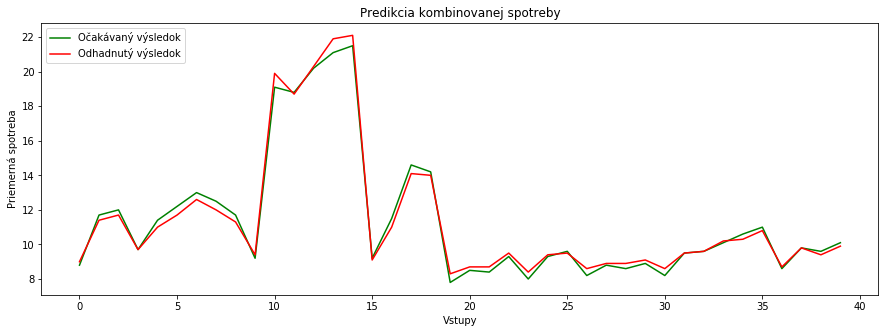

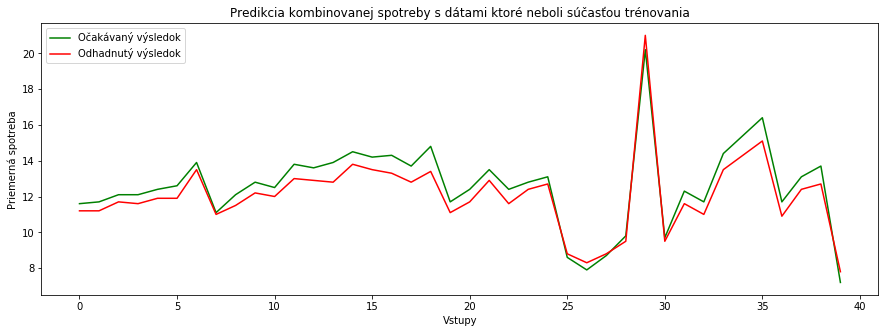

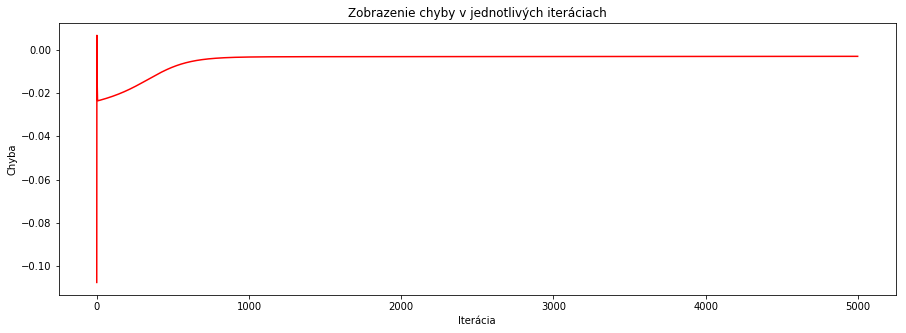

In [146]:
load = 100;
begin = 10;
end = 50;

test_begin = 110;
test_end = 150;

df = pd.read_csv("spotreba.csv", index_col=None)
df=df.drop_duplicates()

print('Ukážka datasetu: ')
print()
print(df.head())
print()
print('-----------------------------------------------------------------------------------------------------------------------')
print()

# premenná 'X' a 'y' sa používa na natrénovanie NS
X = df.iloc[0:load,[0,1]].values # načítame si spotrebu paliva v meste a mimo mesta 
y = df.iloc[0:load,[2]].values # načítanie kombinovanej spotreby
X = X /100; # nakolko X obsahuje dvojciferné čísla tak predelíme 100 aby sme sa pohybovali na intervale (0-1)
expected = y[begin:end]; # slúži len na zachovanie hodnot pred tým ako budú upravene podobne ako pri X
y = y /100;


# test_data_X a test_data_y slúžia na testovanie NS, obsahujú hodnoty, ktoré sa nepoužívali! na trénovanie
test_data_x = df.iloc[test_begin:test_end,[0,1]].values  
test_data_y = df.iloc[test_begin:test_end,[2]].values
test_data_x = test_data_x / 100

# Guess obsahuje dáta pomocou ktorých bola NS trénovaná, pomocou nej skontrolujeme ako presne predikuje NS výsledky
Guess = df.iloc[begin:end,[0,1]].values
Guess = Guess/100;


FF = FeedForward()
errors_=[]
#trenujeme a ukladáme chyby
for i in range(5000):
    FF.train(X, y)
    errors_.append(FF.output_error[0]) 


FF.predict()

pit.subplot()
pit.title('Zobrazenie chyby v jednotlivých iteráciach')
pit.plot(errors_,'r')
pit.xlabel('Iterácia')
pit.ylabel('Chyba')

